<a target="_blank" href="https://colab.research.google.com/github/espseongsm/ml_study/blob/main/binary_classification_modeling.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Supervised learning
머신러닝의 한 종류인 Supervized learning입니다.

우리가 일반적으로 알고 있는 일차함수에서 시작하겠습니다. 먼 기억이지만 중학교 수학시간을 기억해보면 일차함수에서 우리가 모르는 값은 x 입니다. 그래서 x를 구하기 위해서 계산을 합니다.

\begin{align}
  \mathbf{y} = \mathbf{a} \cdot \mathbf{x} + \mathbf{b}
\end{align}

아래의 공식이 지도학습에 해당하는 대부분의 머신러닝 알고리즘의 시작점입니다. 일차함수와 비슷합니다. 하지만 머신러닝의 지도학습에서는 x와 y를 알고 있습니다. 이것을 우리는 데이터라고 부릅니다. 모르는 $\alpha$와 $\beta$를 추정해가는 과정을 모델을 학습시킨다 또는 훈련시킨다라고 표현합니다. $\alpha$와 $\beta$를 coefficient라고 부릅니다. 그래서 Linear model이라고 부르기도 합니다.

\begin{align}
  \mathbf{y} = \mathbf{X} \cdot \mathbf{\alpha} + \mathbf{\beta}
\end{align}

다시 한번 강조하시만 우리가 모르는 값은 $\alpha$와 $\beta$입니다. 이 것의 실제값을 정확하게 추정해가는 과정이 머신러닝입니다. 그렇다면 이 일차함수처럼 보이는 머신러닝 공식을 그림을 표련해보겠습니다. 왜 모르는 값을 수학적으로 정확하게 계산하지 못하고 추정하는 지 알 수 있습니다.  

Mean Squared Error: 0.9309


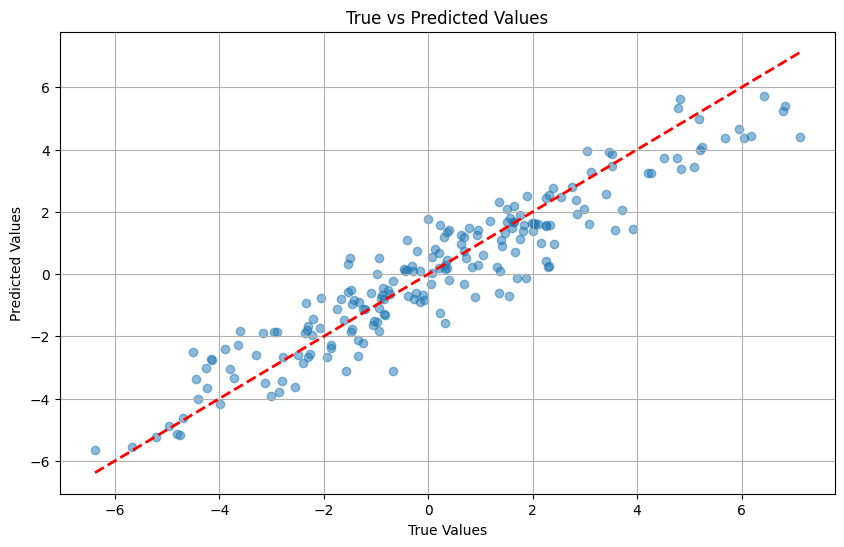

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Set the random seed for reproducibility
np.random.seed(42)

# Generate fake data
num_samples = 1000
num_features = 10

# Feature matrix (X)
X = np.random.randn(num_samples, num_features)

# Coefficients (alpha)
alpha = np.random.randn(num_features)

# Intercept (beta)
beta = np.random.randn(num_samples)

# Target vector (y)
y = X.dot(alpha) + beta

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')

# Plot true vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.grid(True)
plt.show()


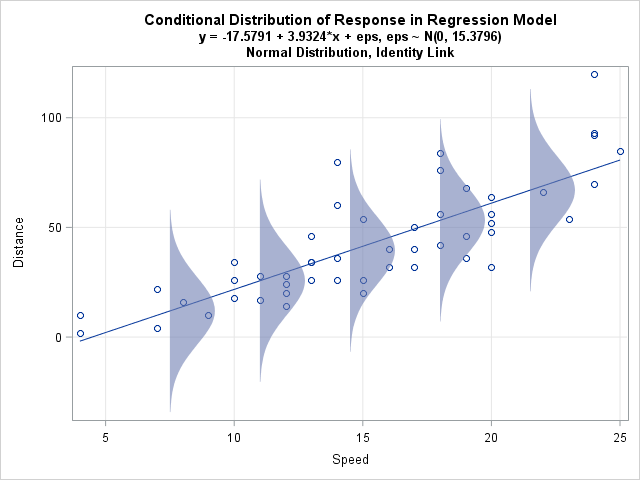

## Regression
이번 주제에는 해당하지 않기 때문에 건너뛰고 가장 많이 활용되어 유용한 분류로 들어가 보겠습니다.

## Classification
클래스를 예측한다고 생각하면 편합니다. 다시 말해서 데이터의 기 정의된 클래스를 학습하여 앞으로 들어올 데이터의 클래스를 예측할 수 있는 모델이 분류모델(classification model)입니다.

기본이 되는 logistic regression의 공식입니다.
$$
\mathbf{y} = \frac{1}{1 + e^{-(\mathbf{X} \cdot \mathbf{\alpha} + \mathbf{\beta})}}
$$

이 공식을 sigmoid라고 부릅니다. 아래와 같이 동작하는 것을 알 수 있습니다. y축을 보는 것이 좋은데요. 0과 1 사이의 값을 산출합니다. 그래서 확률을 계산하는 공식이라는 것을 알 수 있습니다.

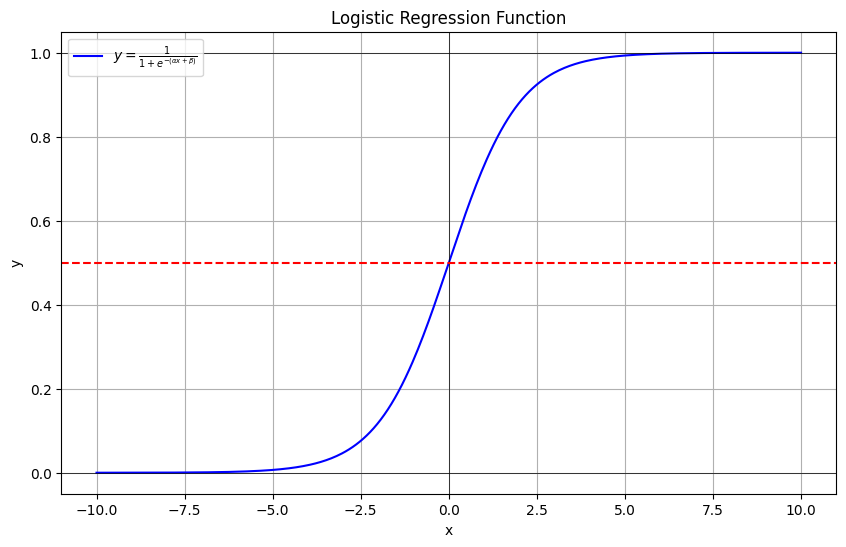

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the logistic regression equation
def logistic_regression(x, alpha, beta):
    return sigmoid(alpha * x + beta)

# Generate a range of values for x
x = np.linspace(-10, 10, 400)

# Define the coefficients alpha and beta
alpha = 1
beta = 0

# Compute the logistic regression values
y = logistic_regression(x, alpha, beta)

# Plot the logistic regression function
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=r'$y = \frac{1}{1 + e^{-(\alpha x + \beta)}}$', color='blue')
plt.axhline(0, color='black',linewidth=0.5)
plt.axhline(1, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.axhline(0.5, color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Logistic Regression Function')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


Sigmoid의 일반화된 버전도 있습니다. Hyperbolic Tangent입니다.

$$
\tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}
        = \frac{e^{\mathbf{X} \cdot \mathbf{\alpha} + \mathbf{\beta}} - e^{-({\mathbf{X} \cdot \mathbf{\alpha} + \mathbf{\beta})}}}{e^{\mathbf{X} \cdot \mathbf{\alpha} + \mathbf{\beta}} + e^{-({\mathbf{X} \cdot \mathbf{\alpha} + \mathbf{\beta})}}}
$$

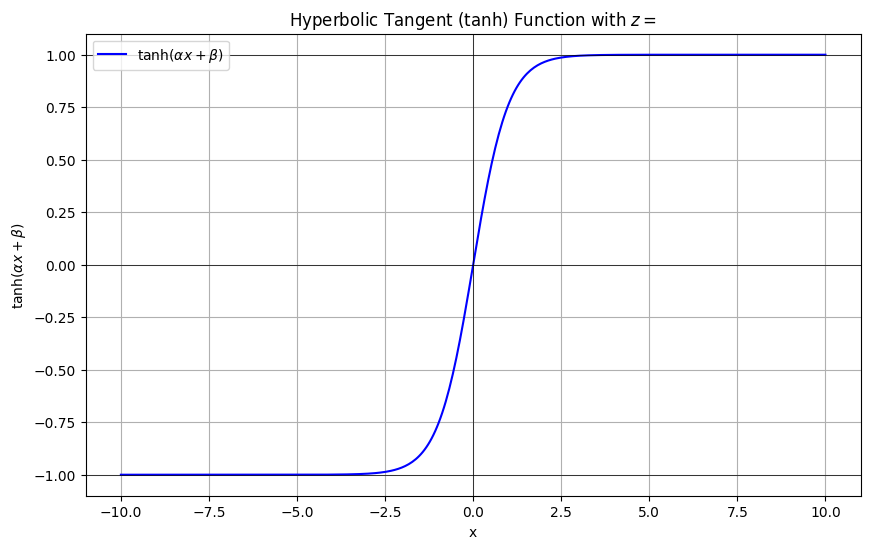

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the hyperbolic tangent function
def tanh(z):
    return np.tanh(z)

# Define the logistic regression equation with z = αx + β
def tanh_regression(x, alpha, beta):
    return tanh(alpha * x + beta)

# Generate a range of values for x
x = np.linspace(-10, 10, 400)

# Define the coefficients α and β
alpha = 1
beta = 0

# Compute the tanh regression values
y = tanh_regression(x, alpha, beta)

# Plot the tanh regression function
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=r'$\tanh(\alpha x + \beta)$', color='blue')
plt.axhline(0, color='black', linewidth=0.5)
plt.axhline(1, color='black', linewidth=0.5)
plt.axhline(-1, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('x')
plt.ylabel(r'$\tanh(\alpha x + \beta)$')
plt.title('Hyperbolic Tangent (tanh) Function with $z = \alpha x + \beta$')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

아래의 그래프처럼 스케일링 변수를 활용하면 변화정도를 조절할 수 있습니다.

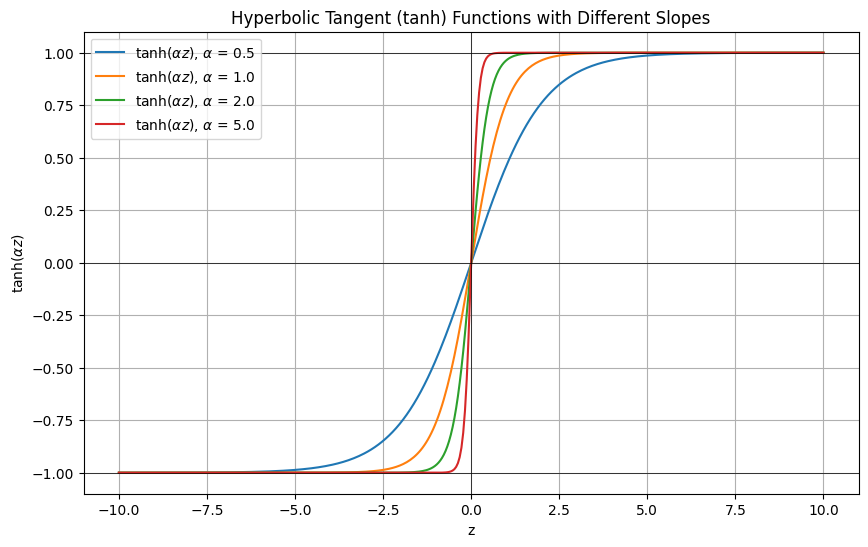

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the hyperbolic tangent function
def tanh(z, alpha):
    return np.tanh(alpha * z)

# Generate a range of values for z
z = np.linspace(-10, 10, 400)

# Define different values of alpha
alphas = [0.5, 1.0, 2.0, 5.0]

# Plot multiple tanh functions with different slopes
plt.figure(figsize=(10, 6))
for alpha in alphas:
    plt.plot(z, tanh(z, alpha), label=r'$\tanh(\alpha z)$, $\alpha$ = {}'.format(alpha))

plt.axhline(0, color='black', linewidth=0.5)
plt.axhline(1, color='black', linewidth=0.5)
plt.axhline(-1, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('z')
plt.ylabel(r'$\tanh(\alpha z)$')
plt.title('Hyperbolic Tangent (tanh) Functions with Different Slopes')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

### Decision Boundary

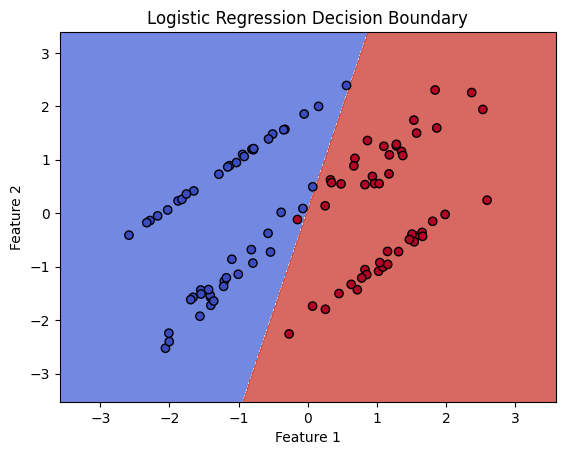

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Generate a synthetic dataset
np.random.seed(42)
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Fit a logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Create a mesh to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict probabilities for the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()


### 가상 데이터 생성
처음 시작은 가상 데이터를 생성하여 모델을 만들어보겠습니다. 가상 데이터를 만드는 과정은 생각보다 중요합니다. 공부를 시작하는 사람에게는 머신러닝의 이론에 집중할 수 있게 도와주고 시뮬레이션을 하는 사람에게는 예상되는 상황에 맞는 데이터를 생성해서 실험을 진행해 볼 수 있게 도와줍니다. 실례로 코로나바이러스가 우리를 위협하던 초기에 많은 사람들이 이 바이러스의 전파 패턴에 대해서 연구할 때 사용되었습니다.

In [ ]:
import numpy as np
import pandas as pd

# Set the random seed for reproducibility
# random seed가 같으면 같은 무작위성으로 숫자를 출력합니다.
# 따라서 42를 고정하면 같은 결과가 보여집니다
np.random.seed(42)

# Define the number of samples and features
# 데이터의 갯수(행의 수)와 피쳐(열의 수)를 설정합니다.
# 그래서 현재 생성할 가상 데이터는 1,000개의 행과 10개의 연속될 숫자형태의 피쳐를 가질 예정입니다.
# 이 피쳐는 y값을 예측할 때 사용되기 떄문에 X라고 통칭합니다.
num_samples = 1000
num_features = 10

# Generate random feature data
# 이제 X를 생성해보겠습니다.
X = np.random.randn(num_samples, num_features)

# Generate a binary target variable with some random noise
# Assume that the first half of the features contribute positively to the target,
# and the second half contribute negatively
# 알파를 coefficient라고 부릅니다. 알파를 만들어서 linear combination을 만듭니다.
coefficients = np.array([1]*5 + [-1]*5)
linear_combination = X @ coefficients

# Apply a logistic function to get probabilities
# 위에서 만든 linear combination을 sigmoid에 넣어서 확율을 계산합니다.
probabilities = 1 / (1 + np.exp(-linear_combination))

# Generate binary target variable based on probabilities
# 계산한 확률에 따라서 class(label)을 부여합니다.
y = np.random.binomial(1, probabilities)

# Create a DataFrame with the numerical features
# 이제 X와 y를 합쳐서 데이터프레임으로 만들겠습니다.
# 머신러닝 모델을 개발하기 위해서 테이블을 데이터프레임으로 전환하는 것이 필수입니다.
feature_columns = [f'feature_{i+1}' for i in range(num_features)]
df = pd.DataFrame(X, columns=feature_columns)
df['target'] = y

# Generate nominal categorical data
# 연속변수로 이루어진 데이터는 조금 부족한 면이 있어서 일상에서 자주 접할 수 있는 categorical variable을 넣도록 하겠습니다.
nominal_categories = ['apple', 'banana', 'cherry', 'date']
df['fruit'] = np.random.choice(nominal_categories, num_samples)

# Generate ordinal categorical data
# 하나더 만들겠습니다. 이후 데이터 전처리에서 다른 전처리기법을 소개하기 위함입니다.
# 두개의 categorical varibles도 X의 일부입니다.
ordinal_categories = ['High School', 'Bachelor', 'Master', 'PhD']
df['education_level'] = np.random.choice(ordinal_categories, num_samples)

# Display the first few rows of the DataFrame
# 처음 5 row를 보겠습니다.
print(df.head())

# Optionally save to CSV
df.to_csv('enhanced_binary_classification_data.csv', index=False)

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.496714  -0.138264   0.647689   1.523030  -0.234153  -0.234137   
1  -0.463418  -0.465730   0.241962  -1.913280  -1.724918  -0.562288   
2   1.465649  -0.225776   0.067528  -1.424748  -0.544383   0.110923   
3  -0.601707   1.852278  -0.013497  -1.057711   0.822545  -1.220844   
4   0.738467   0.171368  -0.115648  -0.301104  -1.478522  -0.719844   

   feature_7  feature_8  feature_9  feature_10  target   fruit education_level  
0   1.579213   0.767435  -0.469474    0.542560       1   apple             PhD  
1  -1.012831   0.314247  -0.908024   -1.412304       0   apple             PhD  
2  -1.150994   0.375698  -0.600639   -0.291694       1    date     High School  
3   0.208864  -1.959670  -1.328186    0.196861       1   apple             PhD  
4  -0.460639   1.057122   0.343618   -1.763040       1  banana          Master  


### 데이터 분석

In [ ]:
# describe 함수를 활용하면 중요 통계치를 얻을 수 있습니다.
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.010788,0.031292,-0.022542,-0.043075,0.013622,-0.029252,-0.002689,0.005495,-0.023104,0.038105,0.504000
std,1.005433,1.016046,0.983366,0.983406,1.012645,1.037024,1.031230,1.030962,0.986846,0.945284,0.500234
min,-3.922400,-3.688365,-3.241267,-2.943142,-3.138515,-3.170426,-2.801912,-3.601085,-3.007632,-3.176704,0.000000
25%,-0.616527,-0.631506,-0.702626,-0.750008,-0.651541,-0.749592,-0.744779,-0.713176,-0.650034,-0.559290,0.000000
50%,0.014006,0.007605,-0.015036,-0.001346,-0.012020,-0.012086,-0.024976,-0.013284,-0.003221,0.019097,1.000000
75%,0.679698,0.685621,0.613766,0.638310,0.721896,0.680087,0.683319,0.696602,0.608861,0.687027,1.000000
max,3.076860,3.529055,3.152057,3.117681,2.935658,3.926238,3.243093,3.137749,3.377383,3.852731,1.000000


<Axes: >

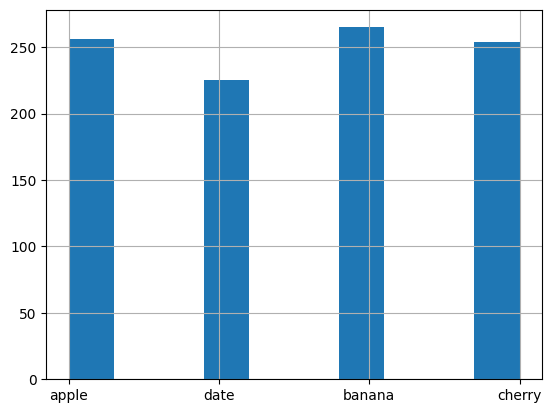

In [ ]:
df['fruit'].hist()

<Axes: >

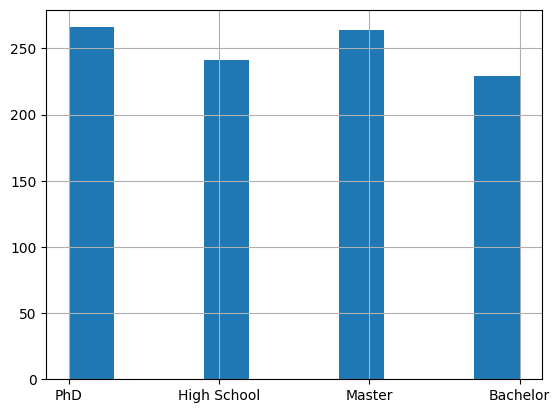

In [ ]:
df['education_level'].hist()

<Axes: >

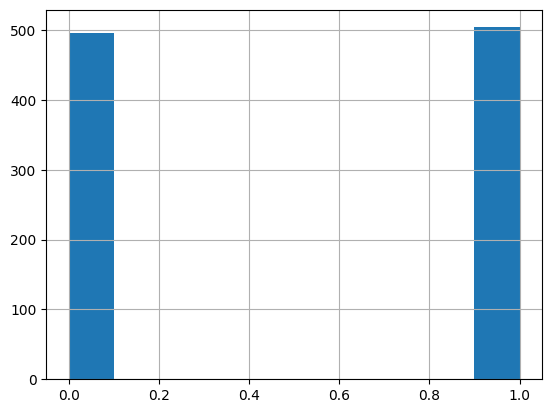

In [ ]:
# 히스토그램을 보면 균형잡힌 데이터셋을 알 수 있습니다.
# imbalanced dataset이라면 resampling 기법을 활용해서 모델의 성능을 높일 수 있습니다.
df['target'].hist()

### 전처리

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# One-hot encode the nominal categorical feature
# categorical variable은 one hot encoding을 우선 적용합니다.
one_hot = pd.get_dummies(df['fruit'], prefix='fruit')

# Ordinal encode the ordinal categorical feature
# 어느 정도 순서가 있는 경우 ordinal encoding을 활용하기도 합니다.
education_levels = ['High School', 'Bachelor', 'Master', 'PhD']
ordinal_encoder = OrdinalEncoder(categories=[education_levels])
df['education_level_encoded'] = ordinal_encoder.fit_transform(df[['education_level']])

# Combine the original DataFrame with the encoded features
df = pd.concat([df, one_hot], axis=1)

# Drop the original categorical columns
df.drop(['fruit', 'education_level'], axis=1, inplace=True)

# Display the first few rows of the modified DataFrame
print(df.head())

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.496714  -0.138264   0.647689   1.523030  -0.234153  -0.234137   
1  -0.463418  -0.465730   0.241962  -1.913280  -1.724918  -0.562288   
2   1.465649  -0.225776   0.067528  -1.424748  -0.544383   0.110923   
3  -0.601707   1.852278  -0.013497  -1.057711   0.822545  -1.220844   
4   0.738467   0.171368  -0.115648  -0.301104  -1.478522  -0.719844   

   feature_7  feature_8  feature_9  feature_10  target  \
0   1.579213   0.767435  -0.469474    0.542560       1   
1  -1.012831   0.314247  -0.908024   -1.412304       0   
2  -1.150994   0.375698  -0.600639   -0.291694       1   
3   0.208864  -1.959670  -1.328186    0.196861       1   
4  -0.460639   1.057122   0.343618   -1.763040       1   

   education_level_encoded  fruit_apple  fruit_banana  fruit_cherry  \
0                      3.0         True         False         False   
1                      3.0         True         False         False   
2          

### 모델학습

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 이제까지 진행한 데이터 전처리를 파이프라인으로 구성해서 모델학습과 통합해보겠습니다.
# Load the dataset
df = pd.read_csv('enhanced_binary_classification_data.csv')

# Display the first few rows of the DataFrame
print(df.head())

# Define feature columns
# 피쳐를 타입에 따라 나눕니다.
numerical_features = [f'feature_{i+1}' for i in range(10)]
nominal_features = ['fruit']
ordinal_features = ['education_level']

# Define the target
target = 'target'

# Split the data into features (X) and target (y)
X = df.drop(columns=[target])
y = df[target]

# Define the column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('nom', OneHotEncoder(), nominal_features),
        ('ord', OrdinalEncoder(categories=[['High School', 'Bachelor', 'Master', 'PhD']]), ordinal_features)
    ])

# Split the data into training, validation, and test sets (70% train, 15% validation, 15% test)
# 테이터셋을 training, validation, test로 나눕니다.
# 나누는 이유는 모델의 성능을 최대한 실제 환경과 비슷한 환경에서 분석하기 위해서 입니다.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Create a pipeline that includes preprocessing and the classifier
# 파이프라인은 전처리와 분류기로 구성됩니다.
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
# 모델을 훈련시킵니다.
pipeline.fit(X_train, y_train)

# Validate the model
# validation set을 활용해서 모델의 성능을 확인합니다.
y_val_pred = pipeline.predict(X_val)
print(f'Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}')
print(classification_report(y_val, y_val_pred))

# Test the model
# test set을 활용해서 모델의 성능을 실제 환경과 가장 가까운 환경에서 확인합니다.
y_test_pred = pipeline.predict(X_test)
print(f'Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}')
print(classification_report(y_test, y_test_pred))


   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.496714  -0.138264   0.647689   1.523030  -0.234153  -0.234137   
1  -0.463418  -0.465730   0.241962  -1.913280  -1.724918  -0.562288   
2   1.465649  -0.225776   0.067528  -1.424748  -0.544383   0.110923   
3  -0.601707   1.852278  -0.013497  -1.057711   0.822545  -1.220844   
4   0.738467   0.171368  -0.115648  -0.301104  -1.478522  -0.719844   

   feature_7  feature_8  feature_9  feature_10  target   fruit education_level  
0   1.579213   0.767435  -0.469474    0.542560       1   apple             PhD  
1  -1.012831   0.314247  -0.908024   -1.412304       0   apple             PhD  
2  -1.150994   0.375698  -0.600639   -0.291694       1    date     High School  
3   0.208864  -1.959670  -1.328186    0.196861       1   apple             PhD  
4  -0.460639   1.057122   0.343618   -1.763040       1  banana          Master  
Validation Accuracy: 0.7533
              precision    recall  f1-score   support

    

### Homework
Student Performance Classifier를 만들어보세요. 데이터는 https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset/data 입니다. 이 데이터는 5개의 label을 가지고 있지만 a학점인 학생과 아닌 학생으로 분류하는 모델을 만들도록 합니다. 따라서 당연히 label을 2개로 변환해야 합니다. Random Forest를 활용합니다.

숙제에 적용될 코드는 윗부분입니다. 위 코드를 활용하면 충분히 classification 모델을 개발 할 수 있습니다.


### Solution
#### 데이터셋 다운로드

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp '/content/drive/MyDrive/Colab Notebooks/ml_study/kaggle.json' ~/.kaggle/

cp: cannot stat '/content/drive/MyDrive/Colab Notebooks/ml_study/kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download rabieelkharoua/students-performance-dataset

Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/66.2k [00:00<?, ?B/s]
100% 66.2k/66.2k [00:00<00:00, 49.3MB/s]


In [ ]:
cd '/content/drive/MyDrive/Colab Notebooks/ml_study'

/content/drive/MyDrive/Colab Notebooks/ml_study


In [ ]:
! unzip '/content/drive/MyDrive/Colab Notebooks/ml_study/students-performance-dataset.zip'

unzip:  cannot find or open /content/drive/MyDrive/Colab Notebooks/ml_study/students-performance-dataset.zip, /content/drive/MyDrive/Colab Notebooks/ml_study/students-performance-dataset.zip.zip or /content/drive/MyDrive/Colab Notebooks/ml_study/students-performance-dataset.zip.ZIP.


#### 데이터 전처리
컬럼 설명은 아래와 같습니다.

- **StudentID: 각 학생의 식별자 (정수)**
- **Age**: 학생의 나이 (정수)
- **Gender**: 학생의 성별 (정수, 이진으로 추정)
- **Ethnicity**: 학생의 인종 (정수, 인코딩된 범주)
- **ParentalEducation**: 부모의 교육 수준 (정수, 인코딩된 범주)
- **StudyTimeWeekly**: 주간 학습 시간 (실수)
- **Absences**: 결석 횟수 (정수)
- **Tutoring**: 학생이 과외를 받는지 여부 (정수, 이진으로 추정)
- **ParentalSupport**: 부모의 지원 수준 (정수, 인코딩된 범주)
- **Extracurricular**: 학생이 방과후 활동에 참여하는지 여부 (정수, 이진으로 추정)
- **Sports**: 학생이 스포츠에 참여하는지 여부 (정수, 이진으로 추정)
- **Music**: 학생이 음악에 참여하는지 여부 (정수, 이진으로 추정)
- **Volunteering**: 학생이 자원봉사를 하는지 여부 (정수, 이진으로 추정)
- **GPA**: 학점 평균 (실수)
- **GradeClass**: 학점 분류 (실수, 타겟 변수일 가능성 있음)

***gabage in gabage out***

In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/ml_study/Student_performance_data _.csv'
data = pd.read_csv(file_path)

#### 데이터 분석
기본적인 통계치를 확인하고 의미없는 변수와 의미있는 변수를 구별합니다

In [ ]:
data.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


<Axes: >

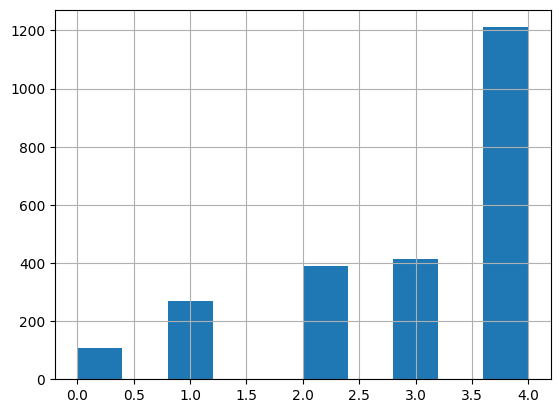

In [ ]:
data.GradeClass.hist()

<Axes: >

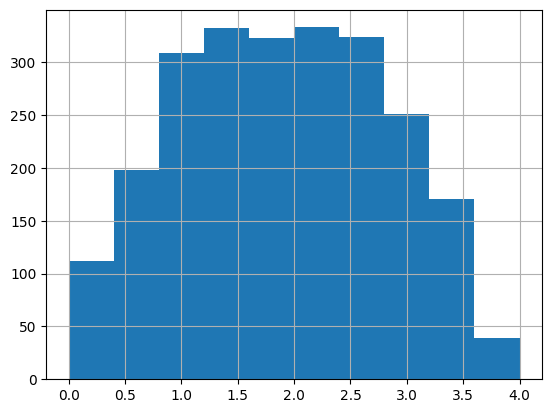

In [ ]:
data.GPA.hist()

### 데이터가 가우지안 분포를 따를까?

GPA 데이터를 가지고 확인해보겠습니다.

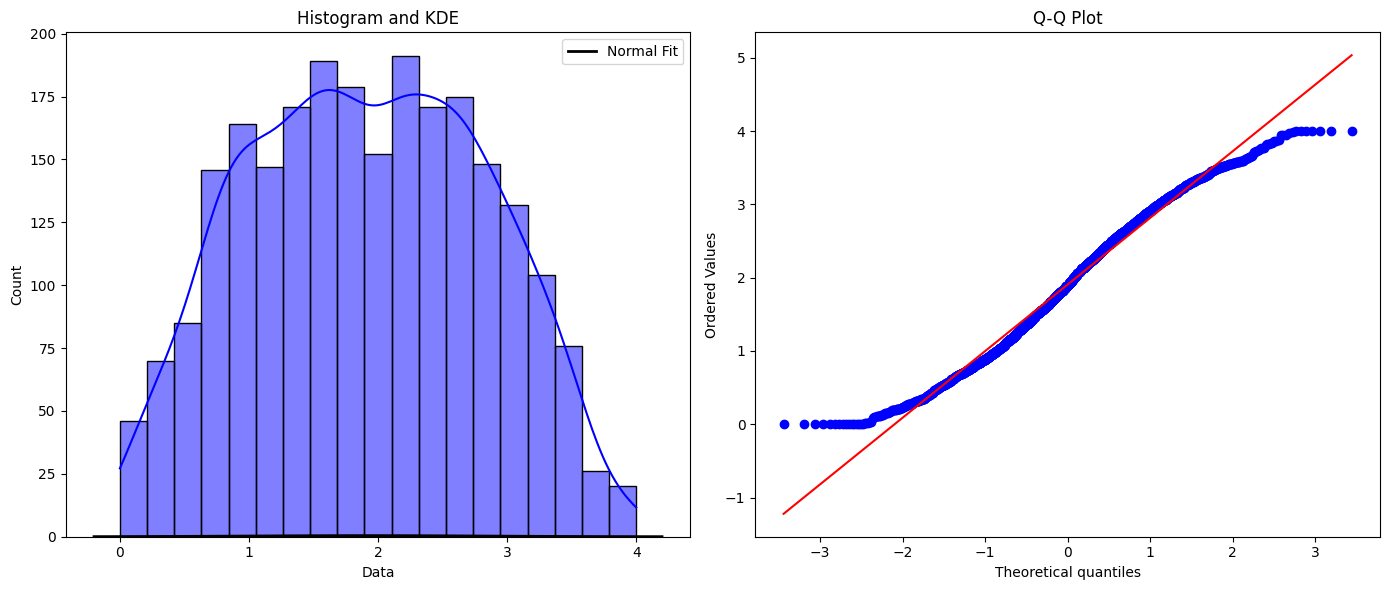

In [ ]:
import seaborn as sns
from scipy.stats import norm
from scipy.stats import probplot
import matplotlib.pyplot as plt
import numpy as np
data1 = data['GPA']

# 히스토그램과 KDE를 그립니다.
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(data1, kde=True, color='blue')
(mu, sigma) = norm.fit(data1)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2, label='Normal Fit')
plt.xlabel('Data')
plt.title('Histogram and KDE')
plt.legend()

# Q-Q plot을 그립니다.
plt.subplot(1, 2, 2)
probplot(data1, dist="norm", plot=plt)
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

KDE(Kernal Density Estimate)은 분포의 모양을 시각화하는데 도움을 주는 방법입니다. 특히 정규분포와 비교할 때 유용합니다. 그리고 QQ plot은 정규분포의 quantile과 비교할 때 사용합니다. 정규분포를 따를수록 점들이 선에 위치합니다.

### Binary Classification 데이터로 변환하기
필요없는 컬럼을 없애고 `Grade Class`를 2개의 범주로 변환하도록 하겠습니다. 변환 후에 데이터의 히스토그램을 보면 균형잡힌 것을 알 수 있습니다.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc

# GradeClass를 a학점과 a학점이 아닌 것으로 변환합니다.
data['GradeClassBinary'] = data['GradeClass'].apply(lambda x: 1 if x == 4.0 else 0)

# 필요없는 데이터를 지우고 X와 y로 분리합니다.
X_binary = data.drop(['GradeClass', 'GradeClassBinary'], axis=1)
y_binary = data['GradeClassBinary']

<Axes: >

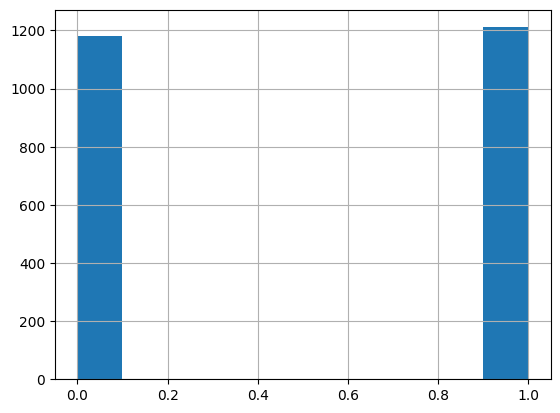

In [ ]:
y_binary.hist()

### Correlation 분석을 해보겠습니다.
상관분석을 하면 예측하고 싶은 값과 예측의 근거가 되는 값의 상관을 알 수 있습니다. 절대값을 기준으로 1이하의 값을 갖게 됩니다. 따라서 상관계수는 -1에서 1사이의 값을 갖습니다. 그리고 절대값이 클수록 큰 상관을 갖게 됩니다. 눈여겨볼 부분은 결석이 성적과 상관이 높다는 것입니다.

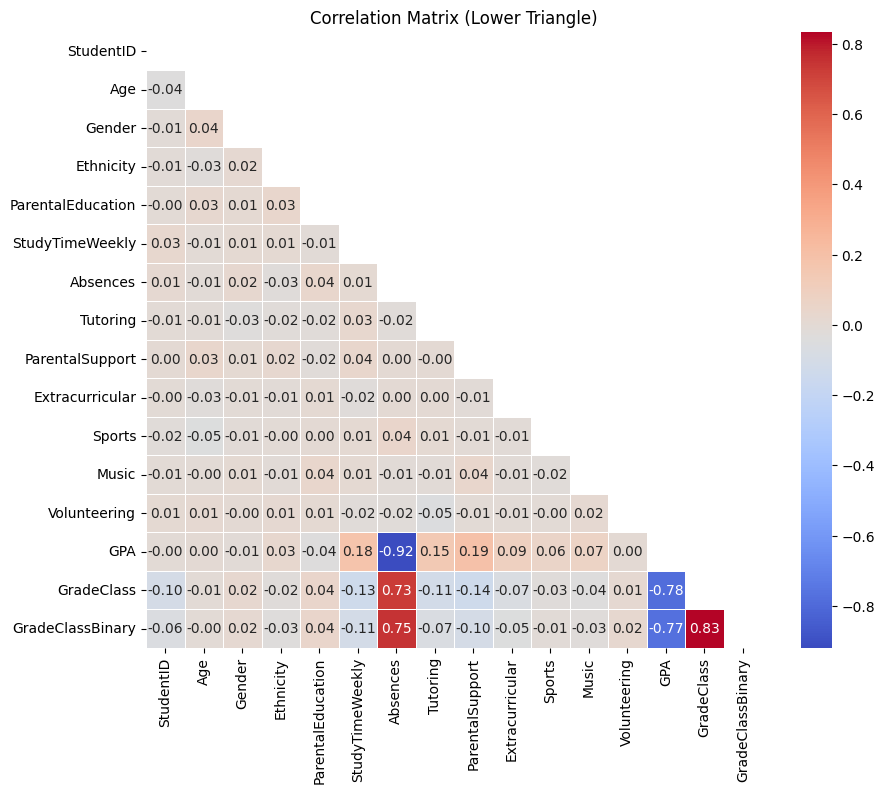

In [ ]:
# correlation matrix를 계산합니다
corr_matrix = data.corr()

# 필요없는 위쪽 삼각형을 가립니다
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 그림의 사이즈를 정해줍니다
plt.figure(figsize=(10, 8))

# 히트맵을 이용해서 상관계수를 표현합니다
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, square=True, fmt=".2f")
plt.title('Correlation Matrix (Lower Triangle)')
plt.show()

### 전처리 및 학습을 위한 파이프라인 구성

전처리와 학습을 파이프라인을 활용해서 하나로 구성하여 추후 배포나 재활용의 용이성을 높입니다.

In [ ]:
# 범주형과 연속형 컬럼을 구분합니다
categorical_cols = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']
continuous_cols = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']

# 데이터를 Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

# ColumnTransformer를 활용해서 전처리를 하나의 파이프라인으로 묶습니다
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_cols),
        ('cat', 'passthrough', categorical_cols)
    ])

# 학습 및 데이터 전처리 파이프라인을 구성합니다. 하나의 파이프라인으로 편의성을 추구합니다.
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# 학습시킵니다
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'StudyTimeWeekly',
                                                   'Absences', 'GPA']),
                                                 ('cat', 'passthrough',
                                                  ['Gender', 'Ethnicity',
                                                   'ParentalEducation',
                                                   'Tutoring',
                                                   'ParentalSupport',
                                                   'Extracurricular', 'Sports',
                                                   'Music',
                                                   'Volunteering'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

## 모델 검증

연속성을 위해 숙제에서 개발한 모델의 성능으로 모델검증법에 대해서 알아보겠습니다

In [ ]:
# 예측값을 생성합니다
y_pred = pipeline.predict(X_test)

# 예측값을 실제값과 비교하여 모델을 검증합니다
binary_report = classification_report(y_test, y_pred)
print(binary_report)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       242
           1       0.94      0.98      0.96       237

    accuracy                           0.96       479
   macro avg       0.96      0.96      0.96       479
weighted avg       0.96      0.96      0.96       479



다양한 metric(precision, recall, f1-score)으로 머리가 혼란스럽기는 하지만 모두 혼돈행렬(complext matrix)를 기반으로 계산됩니다. 따라서 이 혼돈행렬을 기본적으로 이해하는 것이 아주 중요합니다. 모델 평가가 어려워지거나 도메인에 필요한 평가지표를 판단할 때 중요한 기준이 됩니다.

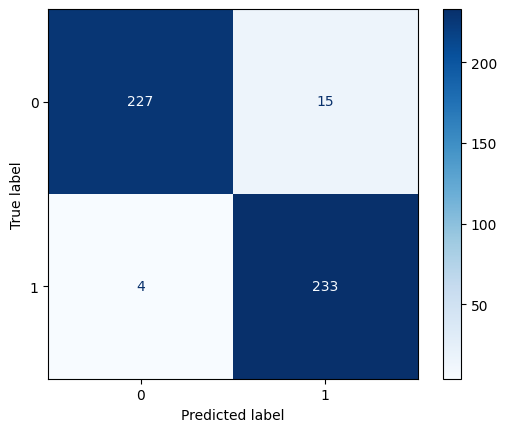

In [ ]:
# 혼돈행렬을 계산합니다
cm = confusion_matrix(y_test, y_pred)

# 혼돈행렬을 시각화합니다
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Precision, Recall, F1-Score, Support

위의 `binary_report`는 랜덤 포레스트 분류기가 학생들이 "A 학점"인지 아닌지를 얼마나 잘 맞췄는지 보여줍니다. 보고서에서 우리가 확인하는 주요 항목들을 설명할게요:

1. **Precision (정밀도)**:
   - 이 값은 분류기가 "A 학점"이라고 예측한 것들 중 실제로 A 학점인 학생의 비율을 나타내요.
   - 예를 들어, 정밀도가 0.80이라면, 분류기가 A 학점이라고 예측한 학생들 중 80%가 실제로 A 학점이라는 뜻이에요.

2. **Recall (재현율)**:
   - 이 값은 실제 A 학점인 학생들 중에서 분류기가 얼마나 많이 맞췄는지를 나타내요.
   - 예를 들어, 재현율이 0.70이라면, 실제 A 학점인 학생들 중 70%를 분류기가 정확히 맞췄다는 뜻이에요.

3. **F1-Score (F1 점수)**:
   - 정밀도와 재현율을 결합한 값으로, 두 값의 균형을 맞추는 지표에요.
   - 예를 들어, F1 점수가 0.75라면, 정밀도와 재현율의 조화를 잘 이루고 있다는 뜻이에요.

4. **Support (지원)**:
   - 각 클래스(여기서는 A 학점과 비 A 학점)에 해당하는 실제 샘플 수를 나타내요.
   - 예를 들어, 지원이 100이라면, 실제로 그 클래스에 속하는 샘플이 100개라는 뜻이에요.

이해를 돕기위해 쉬운 예시로 설명할게요:

```plaintext
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       250
           1       0.68      0.80      0.73       100

    accuracy                           0.83       350
   macro avg       0.80      0.82      0.81       350
weighted avg       0.84      0.83      0.83       350
```

- **A 학점이 아닌 학생들 (클래스 0)**:
  - **정밀도 0.92**: 분류기가 A 학점이 아니라고 예측한 학생들 중 92%가 실제로 A 학점이 아니었어요.
  - **재현율 0.85**: 실제로 A 학점이 아닌 학생들 중 85%를 분류기가 맞췄어요.
  - **F1 점수 0.88**: 정밀도와 재현율의 조화가 잘 이루어졌어요.
  - **지원 250**: 실제로 A 학점이 아닌 학생들이 250명 있었어요.

- **A 학점인 학생들 (클래스 1)**:
  - **정밀도 0.68**: 분류기가 A 학점이라고 예측한 학생들 중 68%가 실제로 A 학점이었어요.
  - **재현율 0.80**: 실제로 A 학점인 학생들 중 80%를 분류기가 맞췄어요.
  - **F1 점수 0.73**: 정밀도와 재현율의 조화가 괜찮았어요.
  - **지원 100**: 실제로 A 학점인 학생들이 100명 있었어요.

- **전체 정확도 0.83**: 전체 학생들 중 83%를 분류기가 정확히 맞췄어요.

이 보고서는 모델이 A 학점을 맞추는 데 있어서 꽤 좋은 성과를 보였지만, 더 개선할 수 있는 여지가 있음을 보여줍니다.

### 혼동행렬 (Confusion Matrix)
혼동행렬(Confusion Matrix)에서 각 성능 지표를 계산하는 방법을 설명해드릴게요. 혼동행렬은 모델이 예측한 값과 실제 값을 비교한 결과를 표 형태로 보여줍니다. 간단한 예시를 통해 설명해보겠습니다. 혼동행렬은 다음과 같은 형태를 가집니다. 여기서 이진 분류(binary classification) 예제를 사용하겠습니다.

|               | 실제 긍정 (Positive) | 실제 부정 (Negative) |
|---------------|----------------------|----------------------|
| **예측 긍정** (True Positive, TP)  | TP (True Positive)   | FP (False Positive)  |
| **예측 부정** (True Negative, TN)  | FN (False Negative)  | TN (True Negative)   |

### 지표 계산 방법
1. **정밀도 (Precision)**:
   - 정밀도는 예측한 긍정 결과 중에서 실제로 긍정인 비율을 나타냅니다.
   - 공식: $$ \text{Precision} = \frac{TP}{TP + FP}$$

2. **재현율 (Recall)**:
   - 재현율은 실제 긍정인 결과 중에서 예측한 긍정 비율을 나타냅니다.
   - 공식: $$\text{Recall} = \frac{TP}{TP + FN}$$

3. **F1-스코어 (F1-Score)**:
   - F1-스코어는 정밀도와 재현율의 조화 평균입니다. 높은 F1-스코어는 정밀도와 재현율 사이의 균형이 잘 맞는다는 것을 의미합니다.
   - 공식: $$\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

4. **정확도 (Accuracy)**:
   - 정확도는 전체 예측 중에서 맞춘 비율을 나타냅니다.
   - 공식: $$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

### 다중 클래스 분류에서의 지표 계산
다중 클래스 분류에서는 매 클래스마다 위의 지표를 계산하고, 이를 평균을 내어 종합적인 성능을 평가합니다. 여기서 두 가지 방식이 있습니다:

1. **매크로 평균 (Macro Average)**:
   - 각 클래스의 지표를 계산한 후, 클래스 간의 평균을 구하는 방식입니다.
   - 모든 클래스에 동일한 가중치를 부여합니다.
   - 예: $$\text{Macro Precision} = \frac{\text{Precision}_{class1} + \text{Precision}_{class2} + \ldots + \text{Precision}_{classN}}{N}$$

2. **가중 평균 (Weighted Average)**:
   - 각 클래스의 지표를 계산한 후, 클래스별 지원(샘플 수)을 고려하여 가중 평균을 구하는 방식입니다.
   - 각 클래스의 샘플 수에 비례한 가중치를 부여합니다.
   - 예: $$\text{Weighted Precision} = \frac{\text{Support}_{class1} \times \text{Precision}_{class1} + \text{Support}_{class2} \times \text{Precision}_{class2} + \ldots + \text{Support}_{classN} \times \text{Precision}_{classN}}{\text{Support}_{class1} + \text{Support}_{class2} + \ldots + \text{Support}_{classN}}$$

### 예시
다음은 간단한 예시입니다. 예를 들어, 예측 결과와 실제 값이 다음과 같다고 가정해 봅시다:

- TP = 40 (예측 긍정이면서 실제 긍정)
- FP = 10 (예측 긍정이지만 실제 부정)
- FN = 5  (예측 부정이지만 실제 긍정)
- TN = 45 (예측 부정이면서 실제 부정)

이 경우의 지표는 다음과 같이 계산됩니다:

- **정밀도 (Precision)**: $$\frac{40}{40 + 10} = 0.80$$
- **재현율 (Recall)**: $$\frac{40}{40 + 5} = 0.89$$
- **F1-스코어 (F1-Score)**: $$2 \times \frac{0.80 \times 0.89}{0.80 + 0.89} = 0.84$$
- **정확도 (Accuracy)**: $$\frac{40 + 45}{40 + 10 + 5 + 45} = 0.85$$

이러한 방법을 사용하면 혼동행렬에서 각 지표를 계산하고 모델의 성능을 평가할 수 있습니다.

### ROC(수신자 조작 특성) 곡선

ROC (Receiver Operating Characteristic) 곡선을 그리고 설명하기 위해서는 먼저 그 구성 요소를 이해해야 합니다. ROC 곡선은 다양한 임계값에서 분류기의 성능을 그래픽으로 나타내며, 진양성 비율(True Positive Rate, TPR)과 가양성 비율(False Positive Rate, FPR) 간의 균형을 보여줍니다.

다음은 ROC 곡선을 그리는 방법과 그것이 의미하는 바에 대한 단계별 가이드입니다:

### ROC 곡선의 구성 요소

1. **진양성 비율 (True Positive Rate, TPR)**, 또는 재현율(Recall), 민감도(Sensitivity):
   $$
   \text{TPR} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
   $$

2. **가양성 비율 (False Positive Rate, FPR)**:
   $$
   \text{FPR} = \frac{\text{False Positives}}{\text{False Positives} + \text{True Negatives}}
   $$

ROC 곡선은 TPR( y축 )과 FPR( x축 )을 다양한 임계값에 대해 플로팅합니다. (0,0)에서 (1,1)로 가는 대각선은 무작위 분류기를 나타내며, 이는 판별력이 없음을 의미합니다. 좋은 모델은 이 대각선 위에 위치한 ROC 곡선을 가집니다.

### ROC 곡선 그리기

다음은 Python의 `scikit-learn`과 `matplotlib` 라이브러리를 사용하여 ROC 곡선을 그리는 방법입니다.

### 설명

- **ROC 곡선**: 플롯은 다양한 임계값에서 가양성 비율에 따라 진양성 비율이 어떻게 변하는지를 보여줍니다. 곡선의 각 점은 다른 임계값을 나타냅니다.
  
- **AUC (곡선 아래 면적)**: 이 지표는 분류기의 전반적인 성능을 정량화합니다. AUC는 0에서 1까지의 값을 가지며, AUC = 1은 완벽한 성능을 의미하고, AUC = 0.5는 판별력이 없음을 의미합니다 (즉, 무작위 추측).

- **대각선 (무작위 분류기)**: (0,0)에서 (1,1)까지의 선은 판별 능력이 없는 분류기를 나타내며, 기준선 역할을 합니다. 좋은 분류기의 곡선은 이 선 위에 위치합니다.

### 주요 포인트

- **높은 TPR과 낮은 FPR**: 이상적인 분류기는 높은 TPR (1에 가까움)과 낮은 FPR (0에 가까움)을 가지며, 결과적으로 곡선이 높고 왼쪽에 위치합니다.

- **모델 비교**: 여러 모델이 있는 경우, ROC 곡선을 비교하여 어떤 모델이 더 성능이 좋은지 확인할 수 있습니다. AUC가 더 높은 모델이 일반적으로 더 좋습니다.

실제 데이터에 대해 상세한 설명을 원하시면, 실제 예측 확률과 진짜 레이블을 기반으로 ROC 곡선을 계산해야 합니다.

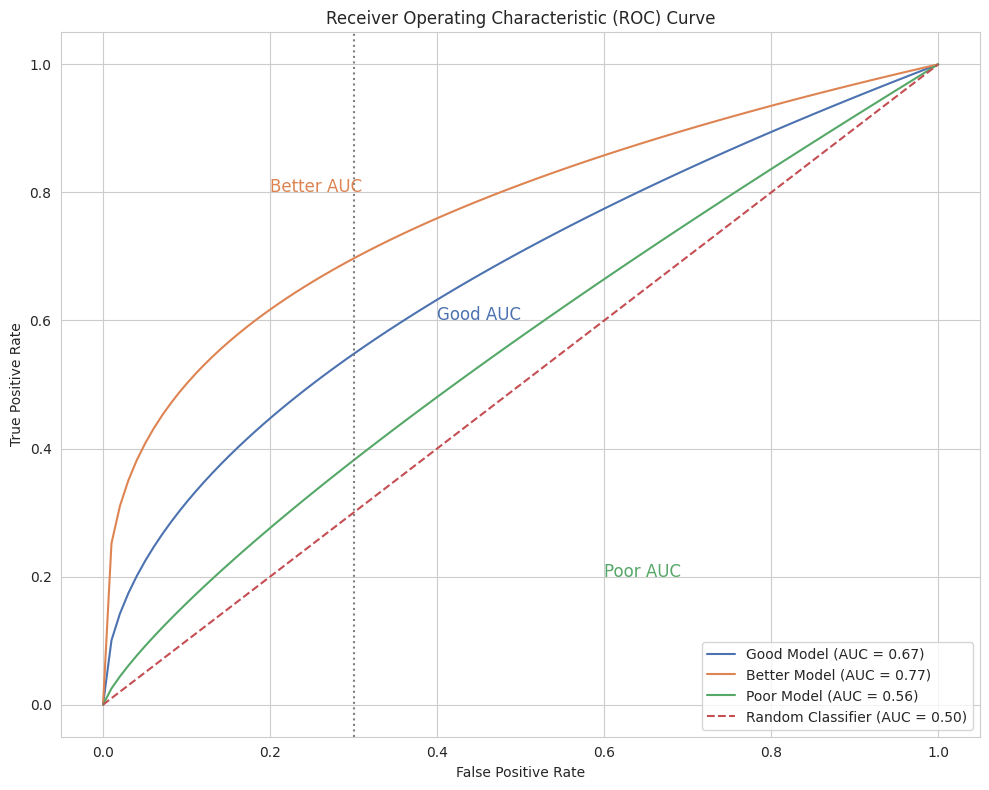

In [ ]:
# Set the style for seaborn
sns.set_style("whitegrid")
sns.set_palette("deep")

# Create data for ROC curves
fpr = np.linspace(0, 1, 100)
tpr_good = np.power(fpr, 0.5)
tpr_better = np.power(fpr, 0.3)
tpr_poor = np.power(fpr, 0.8)

# Calculate AUC for each curve
auc_good = auc(fpr, tpr_good)
auc_better = auc(fpr, tpr_better)
auc_poor = auc(fpr, tpr_poor)

# Create the plot
plt.figure(figsize=(10, 8))

# Plot ROC curves
plt.plot(fpr, tpr_good, label=f'Good Model (AUC = {auc_good:.2f})')
plt.plot(fpr, tpr_better, label=f'Better Model (AUC = {auc_better:.2f})')
plt.plot(fpr, tpr_poor, label=f'Poor Model (AUC = {auc_poor:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier (AUC = 0.50)')

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Add a threshold line
threshold = 0.3
plt.axvline(x=threshold, color='gray', linestyle=':', label=f'Threshold at {threshold}')

# Annotate AUC regions
plt.text(0.6, 0.2, 'Poor AUC', fontsize=12, color=sns.color_palette()[2])
plt.text(0.4, 0.6, 'Good AUC', fontsize=12, color=sns.color_palette()[0])
plt.text(0.2, 0.8, 'Better AUC', fontsize=12, color=sns.color_palette()[1])

# Show the plot
plt.tight_layout()
plt.show()

오버피팅(overfitting)과 언더피팅(underfitting)은 기계 학습에서 모델이 학습 데이터를 얼마나 잘 일반화하는지와 관련된 두 가지 중요한 개념입니다. 이 둘은 모델의 성능에 큰 영향을 미치며, 모델을 설계하고 튜닝할 때 항상 고려해야 할 요소들입니다.

### 오버피팅 (Overfitting)
오버피팅은 모델이 학습 데이터에 너무 잘 맞춰져서, 학습 데이터의 세부 사항과 노이즈까지도 학습해버리는 현상을 말합니다. 이로 인해 학습 데이터에서는 매우 높은 성능을 보이지만, 새로운 데이터나 테스트 데이터에 대해서는 성능이 떨어지게 됩니다. 즉, 모델이 학습 데이터에 과적합하여 일반화 능력이 부족해지는 상태입니다.

**특징:**
- 학습 데이터에 대한 오류(loss)는 매우 낮지만, 검증 데이터나 테스트 데이터에 대한 오류는 높아집니다.
- 복잡한 모델(예: 너무 많은 파라미터, 높은 차수의 다항식 모델 등)에서 자주 발생합니다.
- 학습 곡선을 보면, 학습 데이터에 대한 성능은 계속해서 좋아지는데 반해, 검증 데이터에 대한 성능은 어느 순간부터 악화되기 시작합니다.

**예방 및 해결 방법:**
- **정규화(Regularization):** 모델의 복잡성을 억제하기 위해 L1 또는 L2 정규화를 사용하여 가중치의 크기를 제한합니다.
- **데이터 증강(Data Augmentation):** 학습 데이터를 늘려 모델이 더 다양한 패턴을 학습하도록 합니다.
- **조기 종료(Early Stopping):** 검증 데이터의 성능이 악화되기 시작할 때 학습을 중단합니다.
- **교차 검증(Cross-validation):** 모델의 성능을 더 신뢰할 수 있게 평가하여, 오버피팅을 방지합니다.

### 언더피팅 (Underfitting)
언더피팅은 모델이 학습 데이터의 패턴을 충분히 학습하지 못하는 현상을 말합니다. 이 경우 모델이 너무 단순해서 학습 데이터에 대한 정확도도 낮고, 새로운 데이터에 대한 예측 성능도 떨어집니다. 즉, 모델이 학습 데이터와 새로운 데이터 모두에 대해 충분히 잘 맞추지 못하는 상태입니다.

**특징:**
- 학습 데이터와 검증 데이터 모두에서 오류가 높습니다.
- 학습 곡선에서 학습 데이터와 검증 데이터의 성능이 모두 낮고, 크게 개선되지 않습니다.
- 너무 단순한 모델(예: 너무 적은 파라미터, 낮은 차수의 다항식 모델 등)에서 자주 발생합니다.

**예방 및 해결 방법:**
- **더 복잡한 모델 사용:** 더 많은 파라미터를 가지는 모델이나 더 높은 차수의 모델을 사용하여 학습 데이터를 잘 표현할 수 있도록 합니다.
- **특징 공학(Feature Engineering):** 모델이 학습할 수 있는 더 유용한 특징들을 추가하여 성능을 개선합니다.
- **하이퍼파라미터 튜닝(Hyperparameter Tuning):** 학습률, 결정 트리의 깊이 등 모델의 하이퍼파라미터를 조정하여 성능을 최적화합니다.
- **더 많은 데이터 수집:** 데이터의 양이 충분하지 않다면, 추가적인 데이터를 수집하여 모델이 더 많은 패턴을 학습할 수 있게 합니다.

### 요약
- **오버피팅:** 모델이 학습 데이터에 너무 맞춰져 새로운 데이터에 대한 일반화 능력이 부족한 상태.
- **언더피팅:** 모델이 학습 데이터의 패턴을 충분히 학습하지 못해, 학습 데이터와 새로운 데이터 모두에서 성능이 낮은 상태.

이 두 가지 문제를 해결하기 위해서는 데이터의 양, 모델의 복잡성, 그리고 적절한 하이퍼파라미터 설정을 균형 있게 조절하는 것이 중요합니다.

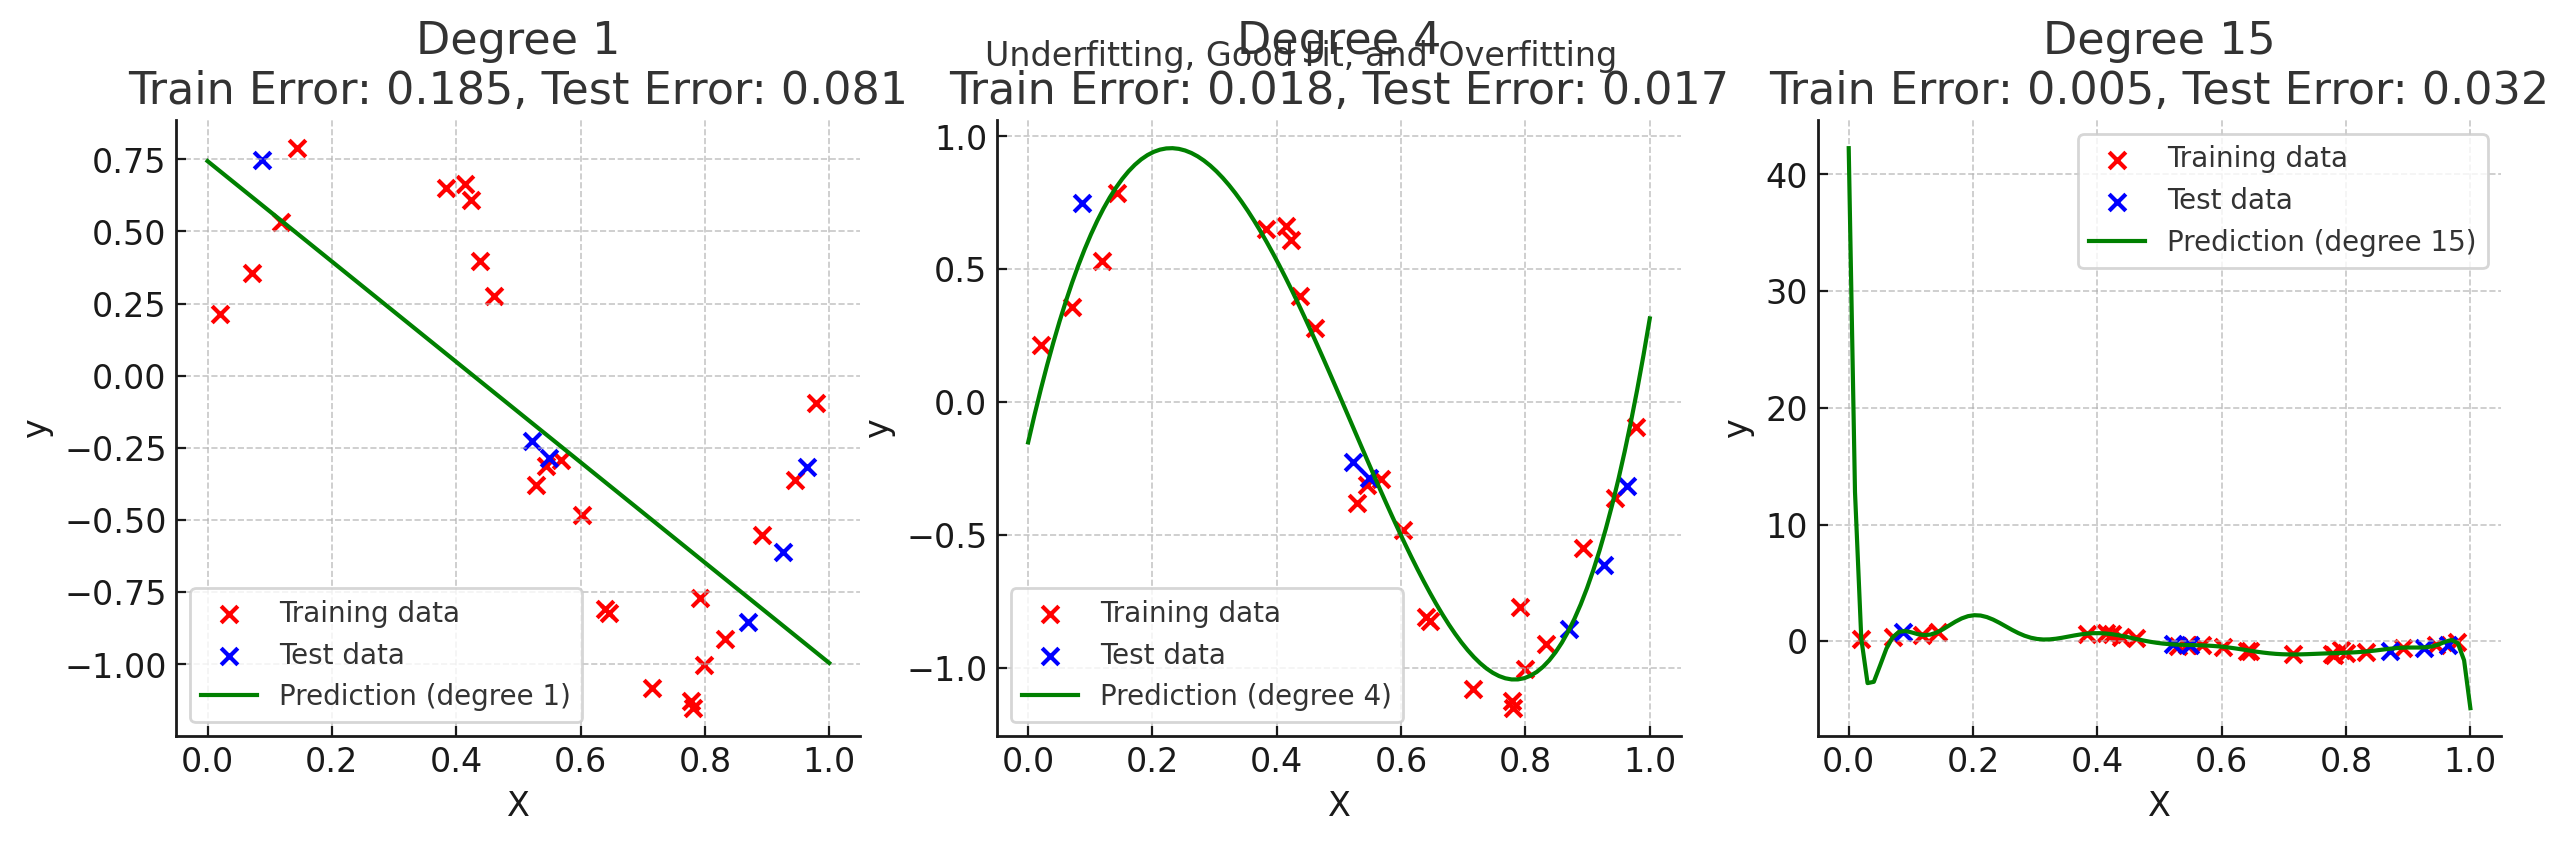

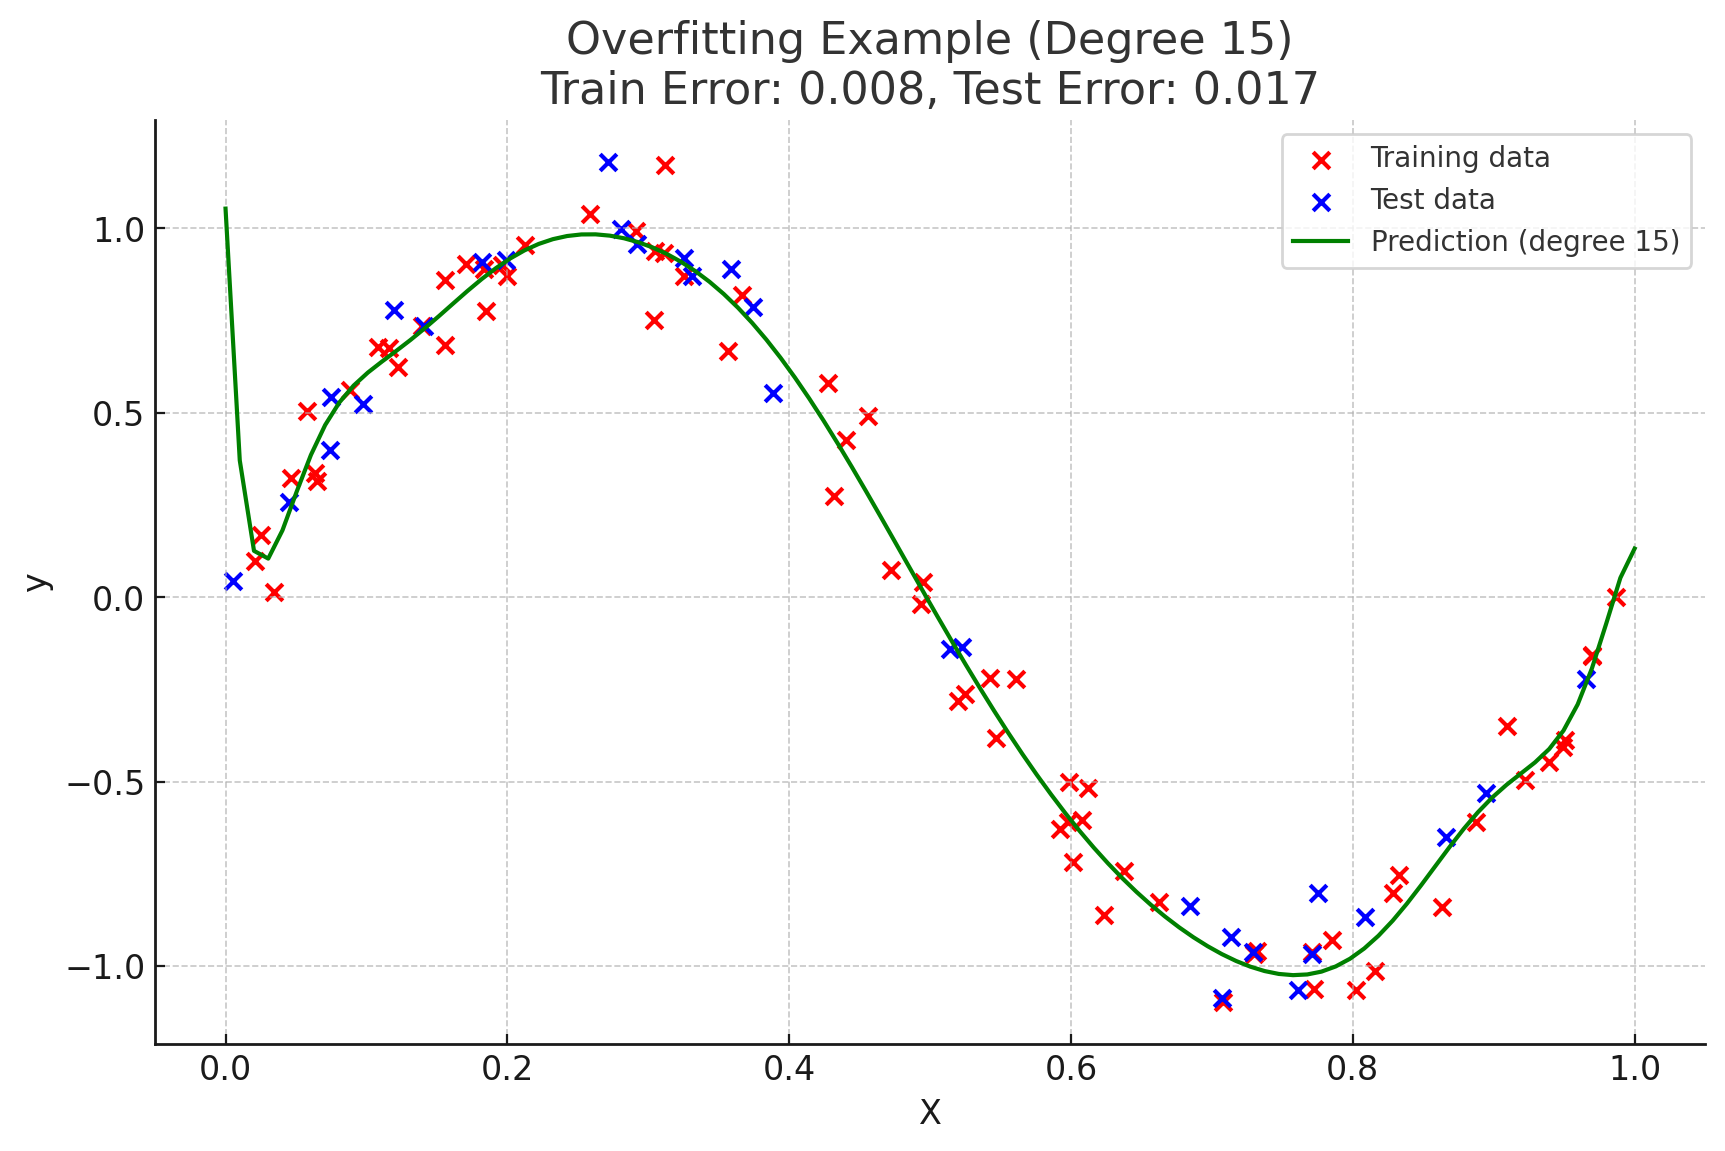

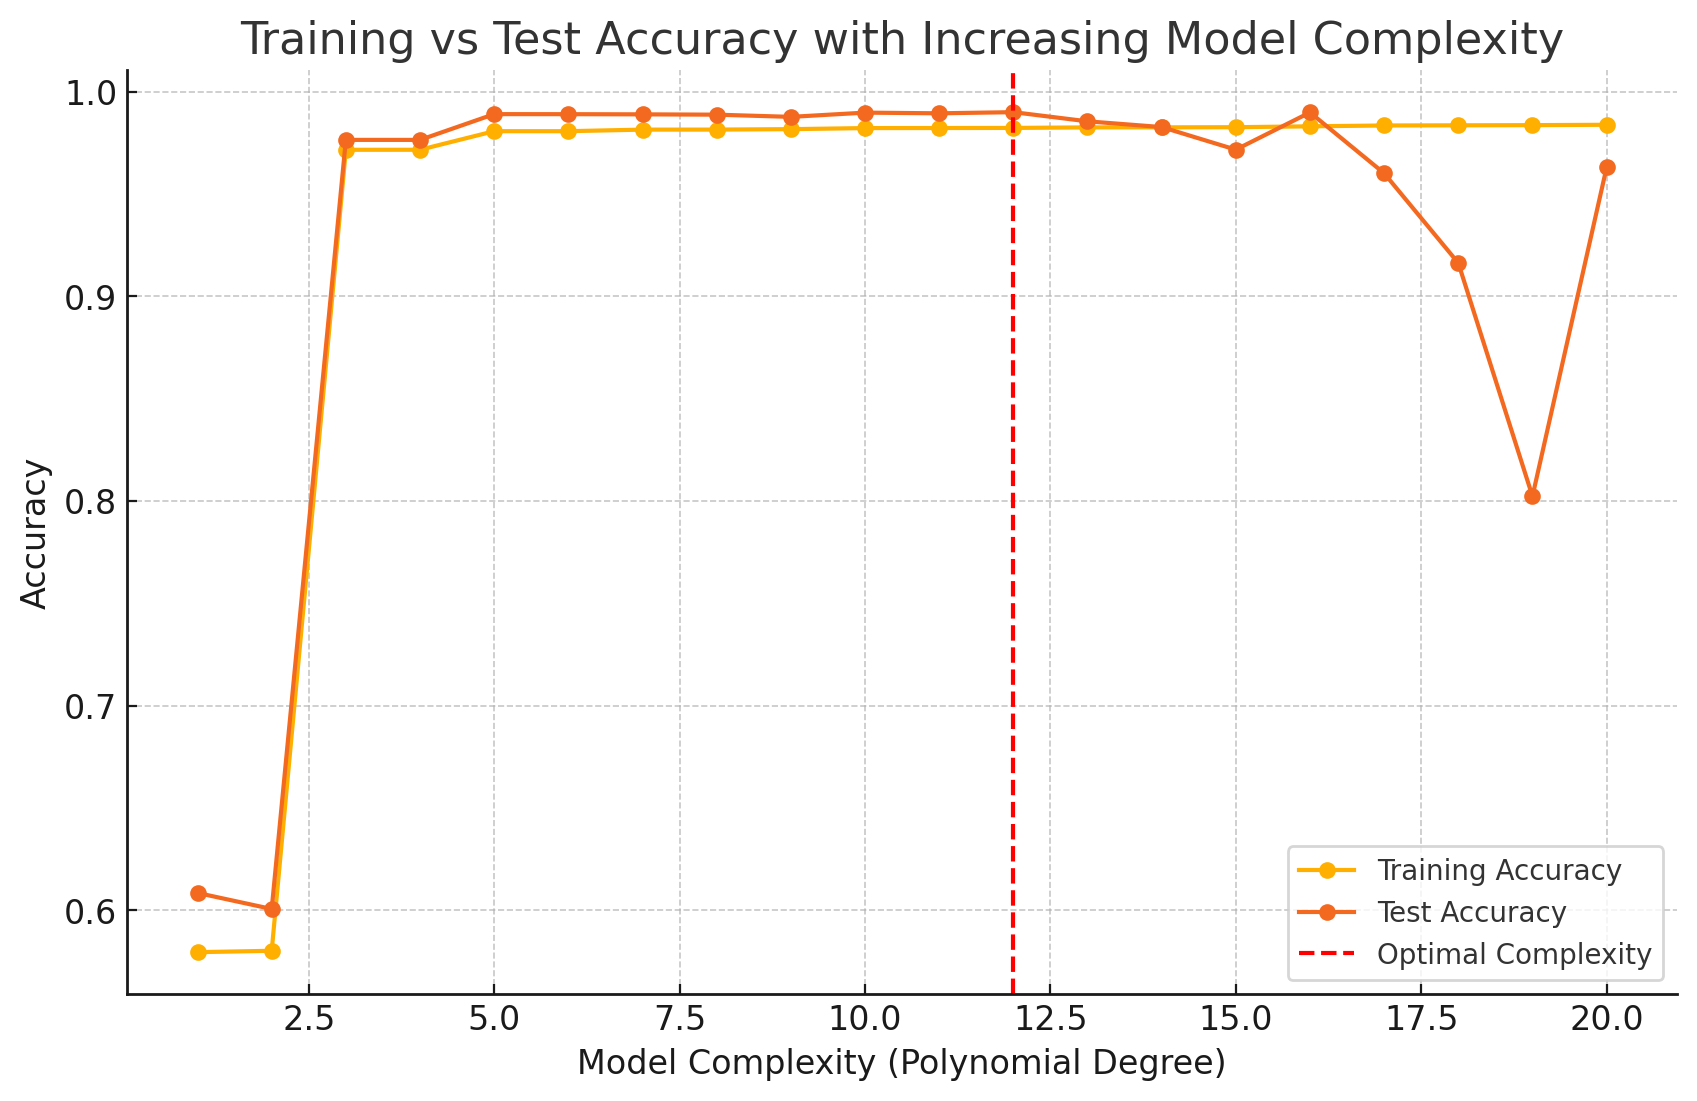
위 그래프는 모델의 복잡도가 증가함에 따라 훈련 정확도와 테스트 정확도가 어떻게 변하는지를 보여줍니다.

- **훈련 정확도(Training Accuracy)**: 모델의 복잡도가 증가할수록 훈련 데이터에 대한 정확도가 계속 높아집니다. 이는 모델이 훈련 데이터를 점점 더 잘 맞추게 된다는 것을 의미합니다.

- **테스트 정확도(Test Accuracy)**: 처음에는 테스트 데이터에 대한 정확도도 함께 증가하지만, 일정 수준의 복잡도를 넘어서면 오히려 정확도가 떨어집니다. 이는 모델이 훈련 데이터에 과적합(overfitting)하여, 새로운 데이터에 대한 일반화 성능이 떨어지기 때문입니다.

- **최적의 복잡도**: 그래프에서 붉은 점선으로 표시된 지점이 최적의 복잡도를 나타내며, 이 지점에서 테스트 정확도가 최대입니다. 이를 넘어서면 오버피팅이 발생합니다.

이 그래프는 모델의 복잡도를 조절하며 최적의 성능을 찾는 과정에서 오버피팅을 피하는 것이 중요함을 잘 설명해줍니다.

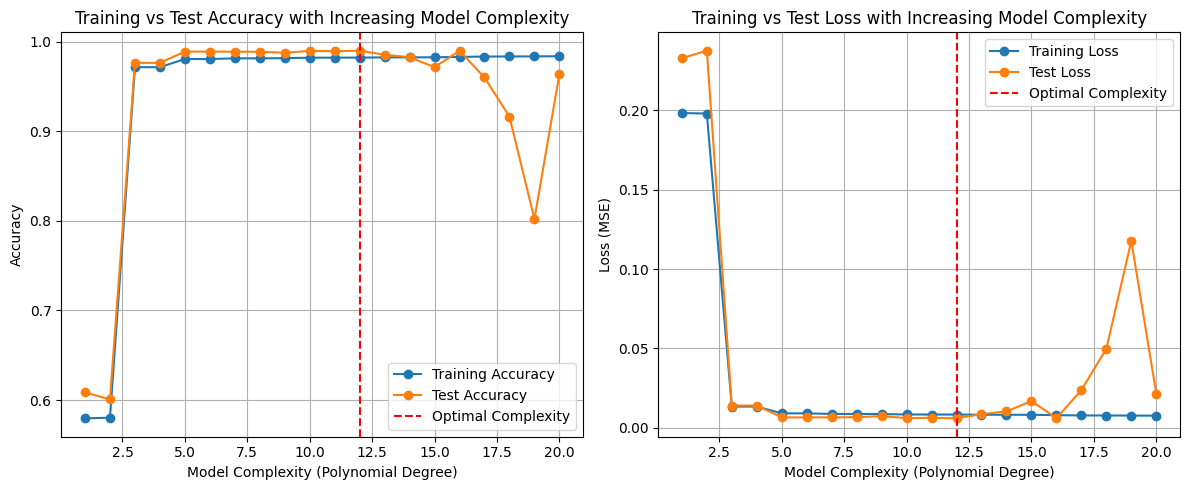

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
X = np.sort(np.random.rand(100))
y = np.sin(2 * np.pi * X) + np.random.randn(100) * 0.1

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize lists to store accuracies and losses
complexities = np.arange(1, 21)
train_accuracies = []
test_accuracies = []
train_losses = []
test_losses = []

for degree in complexities:
    # Create and fit the model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train.reshape(-1, 1), y_train)

    # Predict on training and test sets
    y_train_pred = model.predict(X_train.reshape(-1, 1))
    y_test_pred = model.predict(X_test.reshape(-1, 1))

    # Calculate accuracy as 1 - normalized mean squared error
    train_accuracy = 1 - mean_squared_error(y_train, y_train_pred) / np.var(y_train)
    test_accuracy = 1 - mean_squared_error(y_test, y_test_pred) / np.var(y_test)
    train_loss = mean_squared_error(y_train, y_train_pred)
    test_loss = mean_squared_error(y_test, y_test_pred)

    # Append accuracies and losses to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

# Plotting accuracy graph
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(complexities, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(complexities, test_accuracies, label='Test Accuracy', marker='o')

plt.axvline(x=complexities[np.argmax(test_accuracies)], color='red', linestyle='--', label='Optimal Complexity')

plt.title("Training vs Test Accuracy with Increasing Model Complexity")
plt.xlabel("Model Complexity (Polynomial Degree)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Plotting loss graph
plt.subplot(1, 2, 2)
plt.plot(complexities, train_losses, label='Training Loss', marker='o')
plt.plot(complexities, test_losses, label='Test Loss', marker='o')

plt.axvline(x=complexities[np.argmin(test_losses)], color='red', linestyle='--', label='Optimal Complexity')

plt.title("Training vs Test Loss with Increasing Model Complexity")
plt.xlabel("Model Complexity (Polynomial Degree)")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


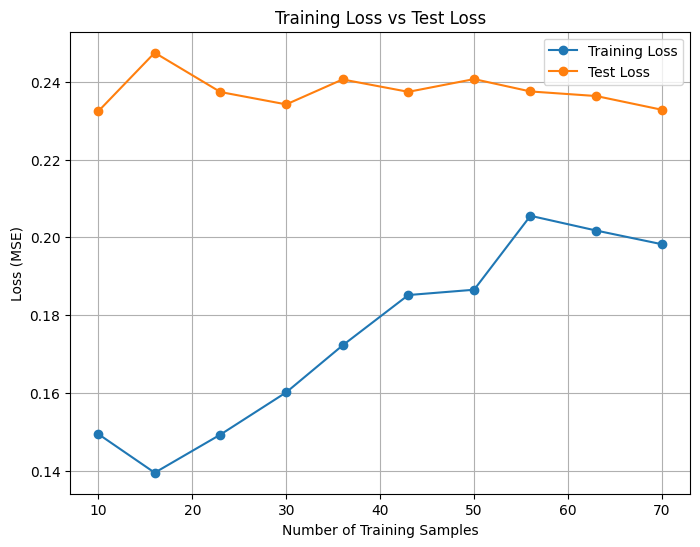

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
X = np.sort(np.random.rand(100)).reshape(-1, 1)
y = np.sin(2 * np.pi * X).ravel() + np.random.randn(100) * 0.1

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a simple Linear Regression model
model = LinearRegression()

# Simulate different stages of training
train_sizes = np.linspace(10, len(X_train), 10).astype(int)
train_losses = []
test_losses = []

for train_size in train_sizes:
    # Train model on increasing amount of training data
    model.fit(X_train[:train_size], y_train[:train_size])

    # Predict on both training and test sets
    y_train_pred = model.predict(X_train[:train_size])
    y_test_pred = model.predict(X_test)

    # Calculate losses
    train_loss = mean_squared_error(y_train[:train_size], y_train_pred)
    test_loss = mean_squared_error(y_test, y_test_pred)

    # Store losses
    train_losses.append(train_loss)
    test_losses.append(test_loss)

# Plotting training loss vs test loss
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_losses, label='Training Loss', marker='o')
plt.plot(train_sizes, test_losses, label='Test Loss', marker='o')

plt.title("Training Loss vs Test Loss")
plt.xlabel("Number of Training Samples")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.show()


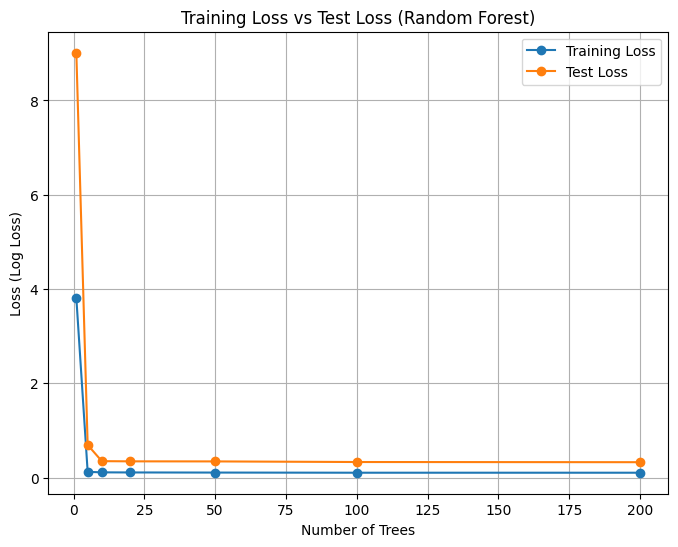

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Generate synthetic data for classification
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Simulate different model complexities by varying the number of trees
n_trees = [1, 5, 10, 20, 50, 100, 200]
train_losses = []
test_losses = []

for n in n_trees:
    # Initialize the Random Forest classifier with varying number of trees
    model = RandomForestClassifier(n_estimators=n, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict probabilities on both training and test sets
    y_train_pred_proba = model.predict_proba(X_train)
    y_test_pred_proba = model.predict_proba(X_test)

    # Calculate log loss (a measure of error) for training and test sets
    train_loss = log_loss(y_train, y_train_pred_proba)
    test_loss = log_loss(y_test, y_test_pred_proba)

    # Store the losses
    train_losses.append(train_loss)
    test_losses.append(test_loss)

# Plotting the loss graph
plt.figure(figsize=(8, 6))
plt.plot(n_trees, train_losses, label='Training Loss', marker='o')
plt.plot(n_trees, test_losses, label='Test Loss', marker='o')

plt.title("Training Loss vs Test Loss (Random Forest)")
plt.xlabel("Number of Trees")
plt.ylabel("Loss (Log Loss)")
plt.legend()
plt.grid(True)
plt.show()


## Hyper-parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# 이제 모델의 성능을 좌지우지하는 hyper-parameter를 tuning 해보겠습니다.
# Define the parameter grid for Grid Search
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create a Grid Search object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=3)

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f'Best parameters found by Grid Search: {grid_search.best_params_}')
print(f'Best cross-validation accuracy: {grid_search.best_score_:.4f}')

# Validate the best model
best_grid_model = grid_search.best_estimator_
y_val_pred = best_grid_model.predict(X_val)
print(f'Validation Accuracy with Grid Search: {accuracy_score(y_val, y_val_pred):.4f}')
print(classification_report(y_val, y_val_pred))

# Test the best model
y_test_pred = best_grid_model.predict(X_test)
print(f'Test Accuracy with Grid Search: {accuracy_score(y_test, y_test_pred):.4f}')
print(classification_report(y_test, y_test_pred))


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for Random Search
param_dist = {
    'classifier__n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'classifier__max_depth': [None] + [int(x) for x in np.linspace(10, 100, num=10)],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

# Create a Random Search object
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, verbose=3, random_state=42)

# Fit the Random Search to the data
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f'Best parameters found by Random Search: {random_search.best_params_}')
print(f'Best cross-validation accuracy: {random_search.best_score_:.4f}')

# Validate the best model
best_random_model = random_search.best_estimator_
y_val_pred = best_random_model.predict(X_val)
print(f'Validation Accuracy with Random Search: {accuracy_score(y_val, y_val_pred):.4f}')
print(classification_report(y_val, y_val_pred))

# Test the best model
y_test_pred = best_random_model.predict(X_test)
print(f'Test Accuracy with Random Search: {accuracy_score(y_test, y_test_pred):.4f}')
print(classification_report(y_test, y_test_pred))
